# Assignment 6: Predicting affairs in marriages

*Due: 4/16*

**Work through the following code and complete the instructions are at the end**

## Step 1: Load and explore the data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [2]:
# Load the affairs dataset from statsmodels. You can find details on the dataset here:
# http://statsmodels.sourceforge.net/0.5.0/datasets/generated/fair.html
dta = sm.datasets.fair.load_pandas().data

# Let's "affair" column: 1 represents a marriage with an affairs, 0 represents no affair
dta['affair'] = (dta.affairs > 0).astype(int)

# Always preview the data to make sure the structure of the data frame is as you expect..
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [3]:
# We have a lot of discrete and categorical variables, which makes plotting less reliable. Try 
#  displaying a `scatter_matrix` to see for yourself.

#  Let's take a look at the summary statistics:

dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [4]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


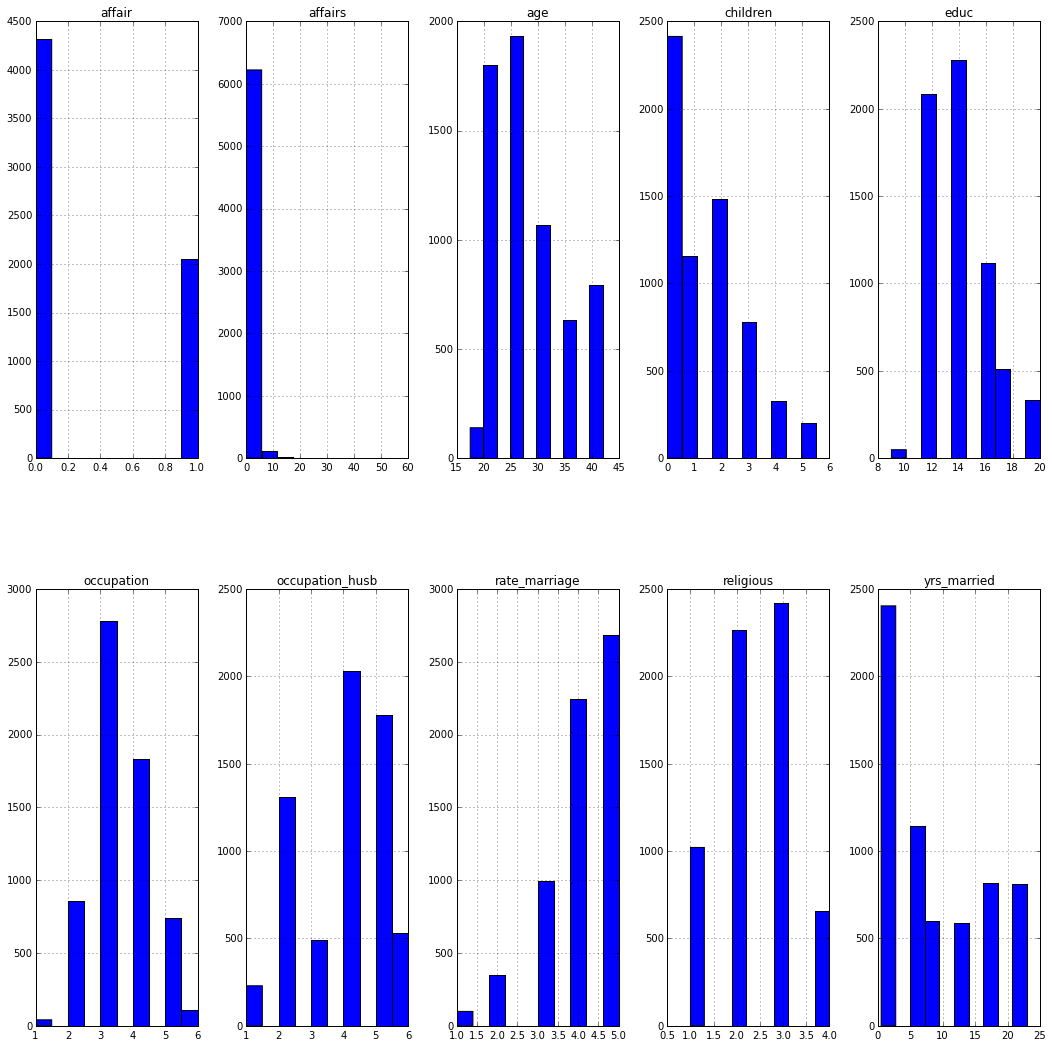

In [6]:
# Due to the quantization of our data, the distributions offer better insight than the scatter plots.
dta.hist(layout=(2, 5), figsize=(18, 18));

affair,False,True
rate_marriage,,
1,25,74
2,127,221
3,446,547
4,1518,724
5,2197,487


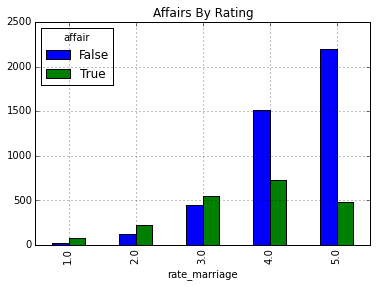

In [7]:
# crosstab is a very powerful function. Play around with it to see what it does 
#   you should know it well!
affairs_by_marriage_rating = pd.crosstab(dta.rate_marriage, dta.affair.astype(bool))

affairs_by_marriage_rating.plot(kind='bar', title='Affairs By Rating');

affairs_by_marriage_rating

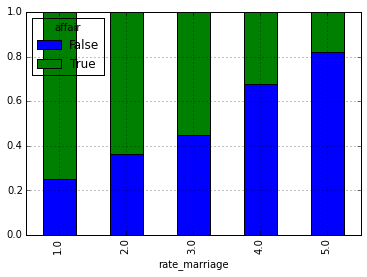

In [9]:
# Explore the following line of code and explain what it does in your own words
percent_cheating = affairs_by_marriage_rating.div(affairs_by_marriage_rating.sum(1), axis=0)

percent_cheating.plot(kind='bar', stacked=True);

## Step 2: Training and validating the model

In [10]:
# Training the model:

X = dta.drop(['affairs', 'affair'], axis=1)

y = dta['affair']

# Use 33% of our dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

model = LogisticRegression()
model = model.fit(X_train, y_train)

In [39]:
# Evaluating the model:
# Which of these is lower and why?

print "Score on training data: ", model.score(X_train, y_train)
print "Score on test data: ", model.score(X_test, y_test)

# The score on test data is lower because he model was fitted on the test data. The difference in score reflects the overfitting of the model. 


#-----------------------------------------------------------
from sklearn import metrics
y_predicted = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)
print pd.DataFrame(conf_matrix, columns=['Faithful (Predicted)', 'Cheated (Predicted)'], index=['Faithful (Actual)', 'Cheated (Actual)'])

print "F1 Score: ", metrics.f1_score(y_test, y_predicted)
print "Accuracy Score: ", metrics.accuracy_score(y_test, y_predicted)
print "Precision Score: ", metrics.precision_score(y_test, y_predicted)


Score on training data:  0.727315357562
Score on test data:  0.713945740124
                   Faithful (Predicted)  Cheated (Predicted)
Faithful (Actual)                  1285                  134
Cheated (Actual)                    467                  215
F1 Score:  0.417070805044
Accuracy Score:  0.713945740124
Precision Score:  0.616045845272


In [54]:
#F regression to select features

column_array = ['rate_marriage','age','yrs_married','children','religious','educ','occupation','occupation_husb']
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train, y_train)
selector_values = pd.DataFrame(np.c_[column_array, (selector.pvalues_).astype(float)], columns=['variable', 'pvalue'])
print selector_values.sort('pvalue')



          variable              pvalue
6       occupation     0.0176475137297
7  occupation_husb      0.221532118285
0    rate_marriage  1.29334602442e-116
2      yrs_married   1.31741021288e-39
4        religious   2.92828701941e-18
5             educ   4.65762747652e-07
1              age   4.81971292533e-20
3         children   5.98833915512e-25


# Assignment:

## Part I: Analyzing the model

From the results of the above model, calculate the following:

- **# of True positives:** Marriages with affairs which were properly classified as having an affair
- **# of True negatives:** Marriages without affairs which were properly classified as not having an affair
- **# of False positives:** Predicting an affair when there was none
- **# of False negatives:** Not Predicting an affair when there was an affair

*Hint:* You should use the **`model.predict`** function to calculate these.

Based on the above compute the following:
- Confusion matrix
- Precision
- Accuracy
- F1 score

State in your own words which each of these mean and the significance of each.

## Part II: Improving the model

Our model achieved a score of roughly 71.3% accuracy on the test dataset. This may not seem too bad, but our average affair rate is about 32%, so a model that always predicted "no" would have an accuracy of `100*(1 - y.mean())` or about 68 percent. So we're not much better off than the null error rate.

Your job is to improve the accuracy model without overfitting the data. To prevent overfitting, be sure to split your data so 70% of the dataset is used for testing and 30% of the dataset is used for training (so you should have 1909 samples in the testing dataset and 4457 samples in the training dataset). You should be able to achieve higher than 72.6% accuracy on the **test** dataset. **Be sure to calculate both the training and test error and strive for the highest accuracy possible.**

**Consider applying the following techniques:**
- Removing features
- Regularization techniques (Look at the 'C' attribute in the `LogisticRegression` function)
- Using a non-linear model

In [71]:
#Test 1 - Ridge Regression: Accuracy score: 67.6%
X3 = dta.drop(['affairs','affair'], axis=1)

y3 = dta[['affair']]

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X3 = poly_features.fit_transform(X3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=123)

from sklearn import linear_model
ridge_regressor3 = linear_model.RidgeCV()
ridge_regressor3.fit(X3_train, y3_train)

print "Training Set R-Squared", ridge_regressor3.score(X3_train, y3_train)
print "Testing Set R-Squared", ridge_regressor3.score(X3_test, y3_test)

from sklearn import metrics
y3_predicted = ridge_regressor3.predict(X3_test).astype(int)

#print y3_predicted.astype(int)
#print y3_test
conf_matrix = metrics.confusion_matrix(y3_test, y3_predicted)
print pd.DataFrame(conf_matrix, columns=['Faithful (Predicted)', 'Cheated (Predicted)'], index=['Faithful (Actual)', 'Cheated (Actual)'])

print "F1 Score: ", metrics.f1_score(y3_test, y3_predicted)
print "Accuracy Score: ", metrics.accuracy_score(y3_test, y3_predicted)
print "Precision Score: ", metrics.precision_score(y3_test, y3_predicted)

Training Set R-Squared 0.212269153869
Testing Set R-Squared 0.115643231518
                   Faithful (Predicted)  Cheated (Predicted)
Faithful (Actual)                  1284                    1
Cheated (Actual)                    618                    7
F1 Score:  0.0221169036335
Accuracy Score:  0.675916230366
Precision Score:  0.875


In [72]:
#Test 2 - Logistic Regression: Accuracy score:71.4%
X4 = dta.drop(['affairs','affair','age','educ','occupation','occupation_husb'], axis=1)

y4 = dta[['affair']]

#from sklearn.preprocessing import PolynomialFeatures
#poly_features = PolynomialFeatures(degree=3)
#X4 = poly_features.fit_transform(X4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, random_state=123)

from sklearn import linear_model
logistic_regressor = linear_model.LogisticRegression()
logistic_regressor.fit(X4_train, y4_train)

print "Training Set R-Squared", logistic_regressor.score(X4_train, y4_train)
print "Testing Set R-Squared", logistic_regressor.score(X4_test, y4_test)

from sklearn import metrics
y4_predicted = logistic_regressor.predict(X4_test)

#print y3_predicted.astype(int)
#print y3_test
conf_matrix = metrics.confusion_matrix(y4_test, y4_predicted)
print pd.DataFrame(conf_matrix, columns=['Faithful (Predicted)', 'Cheated (Predicted)'], index=['Faithful (Actual)', 'Cheated (Actual)'])

print "F1 Score: ", metrics.f1_score(y4_test, y4_predicted)
print "Accuracy Score: ", metrics.accuracy_score(y4_test, y4_predicted)
print "Precision Score: ", metrics.precision_score(y4_test, y4_predicted)

Training Set R-Squared 0.721274685817
Testing Set R-Squared 0.714136125654
                   Faithful (Predicted)  Cheated (Predicted)
Faithful (Actual)                  1163                  122
Cheated (Actual)                    424                  201
F1 Score:  0.424050632911
Accuracy Score:  0.714136125654
Precision Score:  0.622291021672


C:\Users\asilver\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
X3 = dta.drop(['affairs', 'affair'], axis=1)

y3 = dta[['affair']]

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X3 = poly_features.fit_transform(X3)

# Use 33% of our dataset for testing
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=123)

from sklearn import linear_model
linear_regressor3 = linear_model.LinearRegression()

linear_regressor3.fit(X3_train, y3_train)

print "X3_train.shape", X3_train.shape
print "X3_train.shape", X3_test.shape

print "y3_train.shape", y3_train.shape
print "y3_test.shape", y3_test.shape

print "linear_regressor3.predict(X3_train).shape", linear_regressor3.predict(X3_train).shape
print "linear_regressor3.predict(X3_test).shape", linear_regressor3.predict(X3_test).shape

print "Training Set R-Squared"
print linear_regressor3.score(X3_train, y3_train)
print "Testing Set R-Squared"
print linear_regressor3.score(X3_test, y3_test)

X3_train.shape (4265, 165)
X3_train.shape (2101, 165)
y3_train.shape (4265, 1)
y3_test.shape (2101, 1)
linear_regressor3.predict(X3_train).shape (4265, 1)
linear_regressor3.predict(X3_test).shape (2101, 1)
Training Set R-Squared
0.215013956668
Testing Set R-Squared
0.11253909521


In [40]:
X3 = dta.drop(['affairs', 'affair'], axis=1)

y3 = dta[['affair']]

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X3 = poly_features.fit_transform(X3)

# Use 33% of our dataset for testing
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=123)

from sklearn import linear_model
linear_regressor3 = linear_model.LinearRegression()

linear_regressor3.fit(X3_train, y3_train)

print "Training Set R-Squared"
print linear_regressor3.score(X3_train, y3_train)
print "Testing Set R-Squared"
print linear_regressor3.score(X3_test, y3_test)

# evcinnyc [6:03 PM]
# ERROR OUTPUT: shapes (4265,165) and (8,) not aligned: 165 (dim 1) != 8 (dim 0)

Training Set R-Squared
0.215013956668
Testing Set R-Squared
0.11253909521
